In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/KDT_ProjectManagement

/content/drive/MyDrive/Colab Notebooks/KDT_ProjectManagement


In [3]:
# 모듈 로딩
import pandas as pd
import numpy as np
import seaborn as sns
import re
import tensorflow as tf
#import string
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [4]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [5]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 5.2 MB/s 
     |████████████████████████████████| 453 kB 80.0 MB/s 


In [6]:
# KoNLPy Okt 임포트
from konlpy.tag import Okt

In [7]:
df_train = pd.read_csv("../data/관광데이터/train.csv")
df_test = pd.read_csv("../data/관광데이터/test.csv")

In [8]:
df_train.head()

,id,img_path,overview,cat1,cat2,cat3
0,TRAIN_00000,./image/train/TRAIN_00000.jpg,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구
1,TRAIN_00001,./image/train/TRAIN_00001.jpg,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프
2,TRAIN_00002,./image/train/TRAIN_00002.jpg,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식
3,TRAIN_00003,./image/train/TRAIN_00003.jpg,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식
4,TRAIN_00004,./image/train/TRAIN_00004.jpg,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식


In [9]:
df_train = df_train.drop(['id','img_path'], axis=1)
df_train.head()

,overview,cat1,cat2,cat3
0,소안항은 조용한 섬으로 인근해안이 청정해역으로 일찍이 김 양식을 해서 높은 소득을 ...,자연,자연관광지,항구/포구
1,경기도 이천시 모가면에 있는 골프장으로 대중제 18홀이다. 회원제로 개장을 했다가 ...,레포츠,육상 레포츠,골프
2,금오산성숯불갈비는 한우고기만을 전문적으로 취급하고 사용하는 부식 자재 또한 유기농법...,음식,음식점,한식
3,철판 위에서 요리하는 안동찜닭을 맛볼 수 있는 곳이다. 경상북도 안동시에 있는 한식...,음식,음식점,한식
4,※ 영업시간 10:30 ~ 20:30\n\n3대에 걸쳐 아귀만을 전문으로 취급하는 ...,음식,음식점,한식


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16986 entries, 0 to 16985
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   overview  16986 non-null  object
 1   cat1      16986 non-null  object
 2   cat2      16986 non-null  object
 3   cat3      16986 non-null  object
dtypes: object(4)
memory usage: 530.9+ KB


In [11]:
df_train['cat1'].value_counts()

인문(문화/예술/역사)    5614
음식              4912
레포츠             2611
자연              1719
숙박              1434
쇼핑               696
Name: cat1, dtype: int64

In [12]:
df_train['cat2'].value_counts()

음식점       4912
육상 레포츠    2288
자연관광지     1578
역사관광지     1571
숙박시설      1434
문화시설      1220
휴양관광지      889
체험관광지      805
쇼핑         696
축제         569
건축/조형물     328
수상 레포츠     277
관광자원       141
공연/행사      139
산업관광지       93
복합 레포츠      24
항공 레포츠      11
레포츠소개       11
Name: cat2, dtype: int64

In [13]:
df_train['cat3'].value_counts()

한식                3438
야영장,오토캠핑장         1558
바/까페               785
유적지/사적지            622
일반축제               549
                  ... 
MTB                  2
대중콘서트                2
인라인(실내 인라인 포함)       2
스카이다이빙               2
클래식음악회               2
Name: cat3, Length: 128, dtype: int64

In [14]:
df_train['cat3'].unique()

array(['항구/포구', '골프', '한식', '야영장,오토캠핑장', '섬', '일반축제', '유적지/사적지', '일식',
       '자연휴양림', '전시관', '관광단지', '모텔', '스키(보드) 렌탈샵', '바/까페', '채식전문점',
       '한옥스테이', '컨벤션', '성', '중식', '안보관광', '전문상가', '이색거리', '해수욕장', '5일장',
       '미술관/화랑', '공원', '상설시장', '박물관', '도서관', '공연장', '농.산.어촌 체험', '복합 레포츠',
       '펜션', '산', '기념탑/기념비/전망대', '기념관', '자동차경주', '자전거하이킹', '희귀동.식물',
       '유명건물', '수목원', '유원지', '사찰', '강', '자연생태관광지', '박람회', '문화전수시설', '계곡',
       '폭포', '서양식', '종교성지', '동상', '기타행사', '고택', '국립공원', '게스트하우스', '썰매장',
       '요트', '문화원', '래프팅', '승마', '공예,공방', '트래킹', '온천/욕장/스파', '수련시설',
       '해안절경', '패밀리레스토랑', '기암괴석', '기타', '홈스테이', '민물낚시', '콘도미니엄', '민박',
       '테마공원', '유람선/잠수함관광', '바다낚시', '수영', '백화점', '호수', '카약/카누', '외국문화원',
       '면세점', '다리/대교', '카지노', '분수', '동굴', '도립공원', '윈드서핑/제트스키', '특산물판매점',
       '유스호스텔', '고궁', '서비스드레지던스', '민속마을', '전통공연', '문', '식음료', '번지점프',
       '터널', '문화관광축제', '카트', '클럽', '발전소', '대중콘서트', 'MTB', '군립공원', '스케이트',
       '대형서점', '생가', '스카이다이빙', '영화관', '헹글라이딩/패러글라이딩', '스노쿨링/스킨스쿠버다이

In [17]:
# 중복 데이터 체크 및 삭제
df_train.duplicated().sum(), df_test.duplicated().sum()

(12, 0)

In [16]:
# 결측치 확인
df_train.isnull().sum()

overview    0
cat1        0
cat2        0
cat3        0
dtype: int64

In [18]:
# data, target 나누기
data = df_train["overview"]

# 소분류용 target
#target = df_train["cat3"]

# 중분류용 target
target = df_train["cat2"]

# 대분류용 target
#target = df_train['cat1']

print(data.shape, target.shape)

(16986,) (16986,)


In [ ]:
# train, test ,validation 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(data, target, random_state = 42,stratify=target,test_size= 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42,stratify=y_train,test_size= 0.2)

print(f'x_train.shape:{x_train.shape}, y_train.shape:{y_train.shape} ') 
print(f'x_test.shape:{x_test.shape}, y_test.shape:{y_test.shape}')
print(f'x_val.shape:{x_val.shape}, y_val.shape:{y_val.shape}')

x_train.shape:(10870,), y_train.shape:(10870,) 
x_test.shape:(3398,), y_test.shape:(3398,)
x_val.shape:(2718,), y_val.shape:(2718,)


In [ ]:
#x_train[0],y_train[:10]

In [ ]:
# target 인코딩
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_val = le.fit_transform(y_val)
y_test = le.fit_transform(y_test)

print(y_train)


[13  9 12 ... 13  6 12]


## [2] 텍스트 분류
---
- 토큰화
- 불용어 처리
- 정규식(영어로만 이루어진 단어)
- 소문자 변환
- 표제어 추출
- 문장 형태로 복원

In [ ]:
okt = Okt()

In [ ]:
# 텍스트 전처리 함수 
stop_words =['이','있','하','것','들','그','되','수','이','보','않','없','나','사람','주','아니','등','같','우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그것','두','말하','알','그러나','받','못하','일','그런','또','문제','더','사회','많','그리고','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하','그러','속','하나','집','살','모르','적','월','데','자신','안','어떤','내','내','경우','명','생각','시간','그녀','다시','이런','앞','보이','번','나','다른','어떻','여자','개','전','들','사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓']

def preprocessingText(sentence):
    words = []
    
    # 토큰화
    wordlist = okt.morphs(sentence) 
    for word in wordlist: 
        
        # 불용어 처리
        if word not in stop_words: 
            # 알파벳조합을 제외한 모든 문자 제거
            new_word = re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣]', '',word)
            
            words.append(new_word)
            #words.append(word)
            
    # 단어 -> 문장으로 복원
    return " ".join(words)

# data = [preprocessingText(i) for i in data]

In [ ]:
x_train = [preprocessingText(i) for i in x_train]
x_test = [preprocessingText(i) for i in x_test]
x_val = [preprocessingText(i) for i in x_val]

In [ ]:
x_train[0:10],x_test[0],x_val[0]

(['장흥군 유치면 과 장동면 에서 시작 되는 총 연장   의 강 줄기 로 부산 면 을 거쳐 장흥읍 의 중심부 를 가로질러 흐르고 있는 전남  대강  영산강  섬진강  탐진강  의 인 탐진강 은 원래 예 양강 으로 불렀으며  탐라 도 육지 에 처음 으로 배 를 대어 올라왔다하여 탐진강 이라 하였다  아직 까지 오염 되지 않은 자연 그대로 의 백옥 같은 물이 굽이 마다 울창 숲 과 기 암 괴석 의 절경 함께 어우러져 곳 강 줄기 마다 풍류 를 즐기고 시국 을 논 하던  여 의 정자 는 곳 을 찾는 의 발걸음 을 머무르게 한다 ',
  '   여행자 와 여성  아이 행복한 공간           여행가           유아교육 을 전공 하고 년 간 아이 을 교육 해온 주인 장이 운영 하는 여행가 는  여행 행복한  이란 의미 를 담고 있다  주인 장 의 특기 를 살려 옥 에서는 볼 없는 전통 교육 놀이 를 진행 하고 있는 곳 은 포근하고 아기자기한 분위기 물씬 풍기는 옥 이다            혼자 오는 여행객  손님 을 위 배려        여행가 는 원래 있던 가정 을 모두 허물 고 새롭게 지은 옥 으로 년 월 에 완공 했다  본채 와 사랑 채 나란히 용마루 를 마주 하는 구조 로 되어 있는데  가운데 에서 올려다보는 서까래 멋 스럽다  여행가 에는 여행 행복한 이라는 뜻 외 에 의미 숨어 있다  바로  행복한  이러한 의미 를 부여 는 이유 있다  바로 서울 에 살다가 부모님 의 권유 로 전주 에 내려온 주인 장이 남편 과 아이 를 서울 에 두고 홀로 전주 에서 게스트하우스 를 운영 하게 된  그래서 처음 에는 손님 만 받을까 고민 을 많이 했단다  하지만 전주 를 찾는 많은 관광객 연인 이나 친구 이기 에 은 쉽지 않았다  대신 보안 부분 을 세심 하게 신경 써서 옥 을 완성 했다  혼자 여행 하는 손님 여행가 에 묵 을 가장 마음 에 들어 하는 도 역시 보안 이다  투명 문  반투명 문  한실 문 삼 중문 으로 되어 있어 묵는 손님 도 안심 이고  집

In [ ]:
# 텍스트 수치화
def transformText(data, num_words):
  tokenizer = Tokenizer(num_words= num_words) # num_words 
  tokenizer.fit_on_texts(data)
  seq_data = tokenizer.texts_to_sequences(data)
  
  # 사전 단어 총개수
  voca_word_num = len(tokenizer.word_index)
  return(seq_data,voca_word_num)

In [ ]:
seq_x_train,voca_word_num_x_train = transformText(x_train,100000)
seq_x_test,voca_word_num_x_test = transformText(x_test,100000)
seq_x_val,voca_word_num_x_val = transformText(x_val,100000)
print(f'단어사전 단어 개수: {voca_word_num_x_train}')

단어사전 단어 개수: 51475


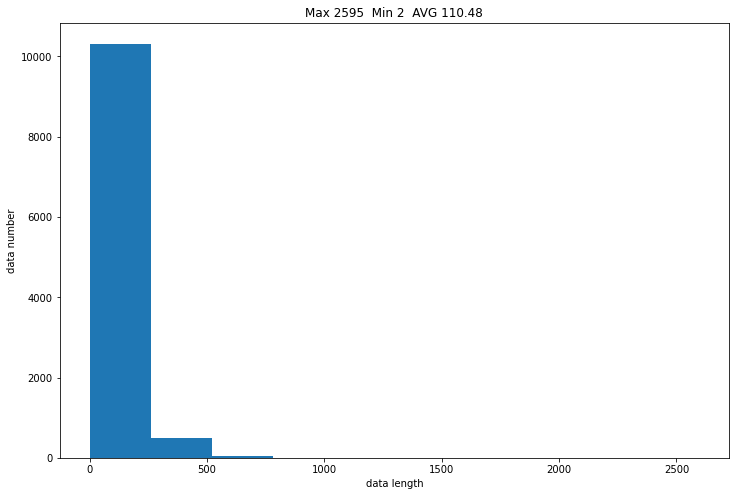

In [ ]:
# 단어 갯수 파악 함수
def checkLength(datas):

  # 기사 개당 단어 개수
  length=[len(data) for data in datas]
  
  # 히스토그램
  plt.figure(figsize=(12,8))
  plt.hist(length)
  plt.title(f'Max {max(length)}  Min {min(length)}  AVG {round(sum(length)/len(length),2)}')
  plt.xlabel('data length')
  plt.ylabel('data number')
  plt.show()
# return length
  
checkLength(seq_x_train)    

In [ ]:
# 패딩 설정:100
pad_length = 100
pad_x_train = pad_sequences(seq_x_train, maxlen= pad_length)
pad_x_test = pad_sequences(seq_x_test, maxlen= pad_length)
pad_x_val = pad_sequences(seq_x_val, maxlen= pad_length)

# 모델구축
---

In [ ]:
from tensorflow.keras.layers import SimpleRNN, GRU,Embedding, Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
EMB_DIM = 32                     # 임베딩 벡터 크기 
WORD_NUM = voca_word_num_x_train # 단어사전 수
HIDDEN_NODE = 1000                 # 은닉층 뉴런 수
INPUT_LENGH = pad_length         # 1문장의 토큰 수

In [ ]:
print(INPUT_LENGH,voca_word_num_x_train )

100 51475


In [ ]:
model = Sequential() #EMB_DIM
model.add(Embedding(WORD_NUM,EMB_DIM, input_length=INPUT_LENGH))
model.add(GRU(HIDDEN_NODE,return_sequences=True))
model.add(Dropout(0.7))
model.add(GRU(HIDDEN_NODE,return_sequences=True))
model.add(Dropout(0.7))
model.add(GRU(HIDDEN_NODE))
model.add(Dropout(0.7))

model.add(Dense(128, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 32)           1647200   
                                                                 
 gru (GRU)                   (None, 100, 1000)         3102000   
                                                                 
 dropout (Dropout)           (None, 100, 1000)         0         
                                                                 
 gru_1 (GRU)                 (None, 100, 1000)         6006000   
                                                                 
 dropout_1 (Dropout)         (None, 100, 1000)         0         
                                                                 
 gru_2 (GRU)                 (None, 1000)              6006000   
                                                                 
 dropout_2 (Dropout)         (None, 1000)              0

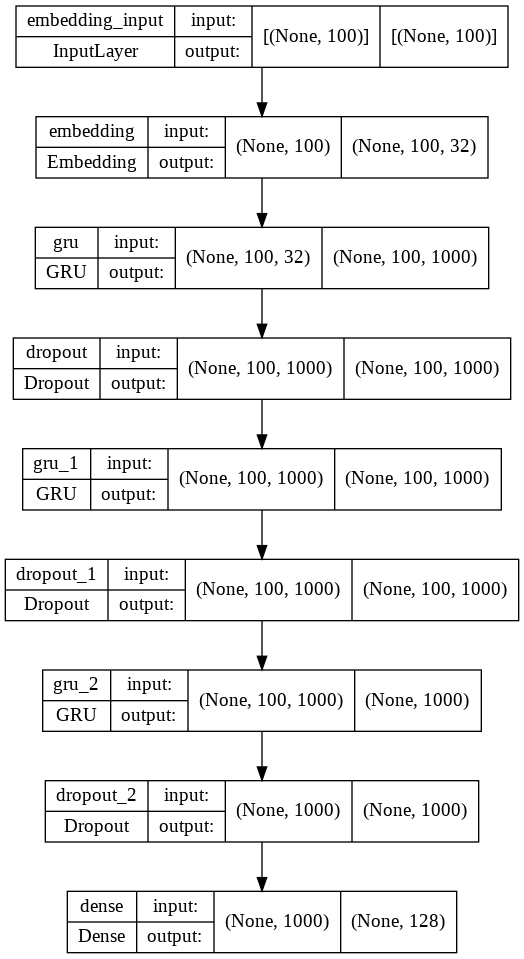

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf
adam = tf.keras.optimizers.Adam(learning_rate =0.1)

# 하이퍼 파라미터 설정
---

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['acc'])

# patience
patience_earlystop = 5
patience_ReduceLROnPlateau = 2

# EarlyStop
earlystop = EarlyStopping(monitor='val_loss',
                          mode='min',
                          patience=patience_earlystop,
                          verbose=1)

# Learning Rate 조절 (변화량 0.5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=patience_ReduceLROnPlateau, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=1e-5)

In [ ]:
epochs=30
batch_size=64

history = model.fit(pad_x_train,
                    y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(pad_x_val,y_val),
                    callbacks=[earlystop, learning_rate_reduction])

Epoch 1/30
170/170 [==============================] - 34s 146ms/step - loss: 2.5356 - acc: 0.2933 - val_loss: 2.5280 - val_acc: 0.2211 - lr: 0.0010
Epoch 2/30
170/170 [==============================] - 24s 139ms/step - loss: 1.4283 - acc: 0.5472 - val_loss: 2.7772 - val_acc: 0.1840 - lr: 0.0010
Epoch 3/30
170/170 [==============================] - ETA: 0s - loss: 0.8095 - acc: 0.7540
Epoch 3: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
170/170 [==============================] - 24s 139ms/step - loss: 0.8095 - acc: 0.7540 - val_loss: 3.8314 - val_acc: 0.1019 - lr: 0.0010
Epoch 4/30
170/170 [==============================] - 24s 139ms/step - loss: 0.3962 - acc: 0.8792 - val_loss: 4.5778 - val_acc: 0.1291 - lr: 5.0000e-04
Epoch 5/30
170/170 [==============================] - ETA: 0s - loss: 0.2313 - acc: 0.9300
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.
170/170 [==============================] - 24s 139ms/step - loss: 0.2313 - acc: 0

In [ ]:
# 학습 히스토리 시각화

# train ,val 비교 함수 (loss, accuracy)
def plot_smoothed_learning_curves(history):
    val_loss = history.history['val_loss']#[-30:-1] #Uncomment if you want to see only the last epochs
    loss = history.history['loss']#[-30:-1]
    acc = history.history['acc']#[-30:-1]
    val_acc = history.history['val_acc']#[-30:-1]
    
    epochs = range(1, len(acc)+1 )
    
    # loss, acc Plot 
    fig, ax = plt.subplots(2,1, figsize=(12, 12))
    ax[0].plot(epochs, smooth_curve(loss), 'ro', label="Smoothed training loss")
    ax[0].plot(epochs, smooth_curve(val_loss), 'b', label="Smoothed validation loss",axes =ax[0])
    legend = ax[0].legend(loc='best', shadow=True)
    ax[0].set_xlabel('Epochs')
    ax[0].set_ylabel('Loss')

    ax[1].plot(epochs, smooth_curve(acc), 'ro', label="Smoothed training accuracy")
    ax[1].plot(epochs, smooth_curve(val_acc), 'b',label="Smoothed validation accuracy")
    legend = ax[1].legend(loc='best', shadow=True)
    ax[1].set_xlabel('Epochs')
    ax[1].set_ylabel('Accuracy')
    return

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

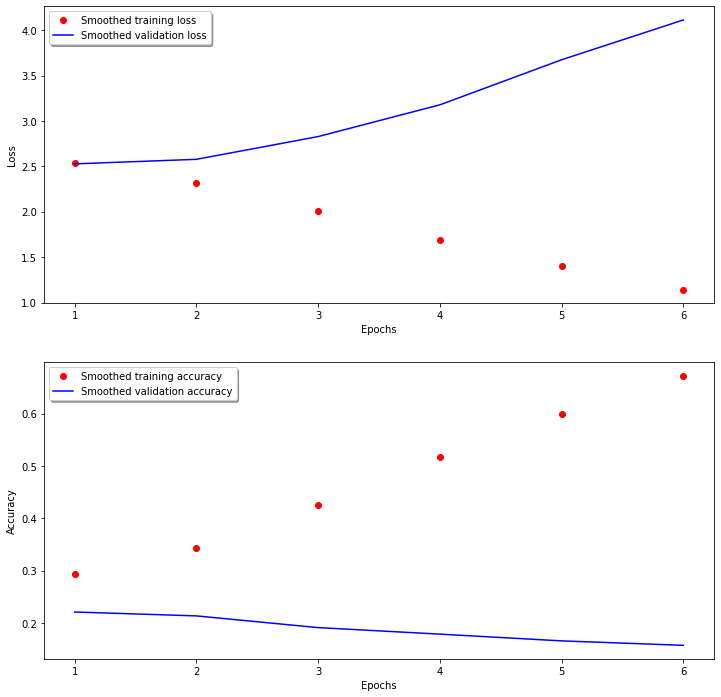

In [ ]:
plot_smoothed_learning_curves(history)

In [ ]:
pred =model.predict(pad_x_test)
pred = np.argmax(pred, axis=1)
print(pred[0:30])
print(y_test[0:30])
count = 0
for i in pred:
    if pred[i] != y_test[i]:
        count += 1
print('total-predict:',len(y_test),'\nCorrect-predict:',len(y_test)-count,'\nWrong-predict:',count)

[11  8 14 10 14 14  9 11  0 14 14 14 14  0 13 11  9 14  7  7 14  9  0 14
 12 14  9 12 14 17]
[ 4 13 17 10 13 12  4  4  0 12 12 10 12 10  4 15 12 12 11 12  6 12 10 10
 12 15 15 10  7  9]
total-predict: 3398 
Correct-predict: 199 
Wrong-predict: 3199


accuracy score: 0.11712772218952325


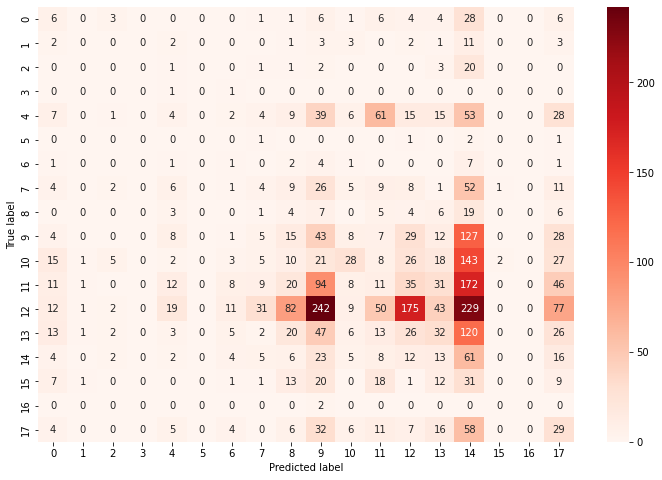

In [ ]:
def plot_confusion_matrix(model_name):
    # Predict 
    y_pred = model_name.predict(pad_x_test)

    # Y_pred는 각 확률값을 나타내므로 max 확률로 선택 
    y_pred = np.argmax(y_pred,axis = 1)
    
    #accuracy scores
    print('accuracy score:', accuracy_score(y_test,y_pred))
    
    # confusion matrix 설정
    cm = confusion_matrix(y_test, y_pred)
    cm = pd.DataFrame(cm, index = range(18), columns = range(18))

    # confusion matrix 시각화
    plt.figure(figsize=(12,8))
    sns.heatmap(cm, cmap="Reds", annot=True, fmt='.0f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return

plot_confusion_matrix(model)

In [19]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [20]:
# train, test 데이터 분리
x_train, x_test, y_train, y_test = train_test_split(data, target, stratify=target,test_size=0.2, random_state = 42)

### PassiveAggressiveClassifier
---

In [21]:
tfidf = TfidfVectorizer(max_df=0.7)
x_train_pac = tfidf.fit_transform(x_train)
x_test_pac = tfidf.transform(x_test)

In [28]:
# PAC 모델 구축
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(x_train_pac, y_train.values.ravel())

# 예측 점수
y_pred_pac= pac.predict(x_test_pac)
score_pac = accuracy_score(y_test, y_pred_pac)
print(f'Accuracy: {round(score_pac*100, 2)}%')

Accuracy: 83.05%


In [33]:
pred = pac.predict(x_test_pac)
y_test=list(y_test)

# 30개만 출력
print(pred[0:10])
print(y_test[0:10])

# 전체 정답, 오답 개수
count = 0
for i in range(len(y_test)):
  if pred[i] != y_test[i]:
      count += 1
print('\ntotal-predict  :',len(y_test),'\nCorrect-predict:',len(y_test)-count,'\nWrong-predict  :',count)

['문화시설' '자연관광지' '음식점' '역사관광지' '자연관광지' '음식점' '문화시설' '문화시설' '역사관광지' '음식점']
['문화시설', '자연관광지', '휴양관광지', '역사관광지', '자연관광지', '음식점', '문화시설', '문화시설', '건축/조형물', '음식점']

total-predict  : 3398 
Correct-predict: 2822 
Wrong-predict  : 576


# 실전 테스트
---
- 테스트할 관광지명 : 사려니숲길
- 답 : 자연관광지

In [ ]:
x_test_aqua = '전형적인 온대성 산지대에 해당하는 숲길 양쪽을 따라 졸참나무, 서어나무, 때죽나무, 산딸나무, 편백나무, 삼나무 등 다양한 수종이 자라는 울창한 자연림이 넓게 펼쳐져 있다. 오소리와 제주족제비를 비롯한 포유류, 팔색조와 참매를 비롯한 조류, 쇠살모사를 비롯한 파충류 등 다양한 동물도 서식하고 있다.청정한 공기를 마시며 이 숲길을 걸으면 스트레스 해소에 좋고 장과 심폐 기능이 향상된다고 알려져 있어 많은 사람들이 찾는 명소이다. 2009년 7월 제주시가 기존의 관광 명소 이외에 제주시 일대의 대표적인 장소 31곳을 선정해 발표한 제주시 숨은 비경 31 중 하나이다.'
x_test_aqua = [preprocessingText(x_test_aqua)]

x_test_aqua = tfidf.transform(x_test_aqua)
x_test_aqua

In [ ]:
# 예측 
pac.predict(x_test_aqua)

array(['자연관광지'], dtype='<U6')